In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("./bank-additional-full.csv", delimiter = ";")

features = df.columns 
outcomes = ["y"]
features = df.columns[:-1]
#print(features)
df[features].head()
df[outcomes].head()

df_outcomes = df[outcomes]
df_features = df[features]

df_outcomes.head()
df_features.head()

#print (df_outcomes.head().to_latex())

df_features = df_features.apply(LabelEncoder().fit_transform)
# df_features.head()

df_outcomes = df_outcomes.apply(LabelEncoder().fit_transform)
# df_outcomes.head()

# df_features.dropna()

X_df = df_features.copy()
Y_df = df_outcomes.copy()

#print(X_df.head().to_latex)
#print(Y_df.head().to_latex)
#print(Y_df.values)

X = X_df.values
Y = Y_df.values.T[0]

Y_df['ID'] = range(1, len(df) + 1)
Y_df.head()

df_features.head()





,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,39,3,1,0,0,0,0,1,6,1,261,0,26,0,1,8,18,16,287,8
1,40,7,1,3,1,0,0,1,6,1,149,0,26,0,1,8,18,16,287,8
2,20,7,1,3,0,2,0,1,6,1,226,0,26,0,1,8,18,16,287,8
3,23,0,1,1,0,0,0,1,6,1,151,0,26,0,1,8,18,16,287,8
4,39,7,1,3,0,0,2,1,6,1,307,0,26,0,1,8,18,16,287,8


In [5]:
df_dummies = pd.get_dummies(df)
df_features = X_df.drop('duration', 1)
#df_features = df_features.drop('y_no', 1)
clf = ExtraTreesClassifier(n_estimators = 100, max_depth = 4)

df_dummies = DummyClassifier()
scores = cross_val_score(clf, X, Y, cv=10,scoring = make_scorer(acc))

df_dummies.fit(X,Y)

print("ACC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f)" % (acc(Y,df_dummies.predict(X))))

ACC: 0.84 (+/- 0.14)
Dummy ACC: 0.80)


In [6]:
clf = ExtraTreesClassifier(n_estimators = 2000, max_depth = 4)
clf.fit(X,Y)

print(acc(Y,clf.predict(X)))

0.8993881713120326


[10 12 19 18 14 15 17 16  7 13  8  0  4  3  9 11  2  1  6  5]
Feature Ranking: 
1. duration (0.199094)
2. pdays (0.172685)
3. nr.employed (0.158163)
4. euribor3m (0.148627)
5. poutcome (0.097024)
6. emp.var.rate (0.091365)
7. cons.conf.idx (0.035128)
8. cons.price.idx (0.030969)
9. contact (0.024692)
10. previous (0.015286)
11. month (0.014077)
12. age (0.005164)
13. default (0.003796)
14. education (0.001020)
15. day_of_week (0.000908)
16. campaign (0.000858)
17. marital (0.000533)
18. job (0.000389)
19. loan (0.000115)
20. housing (0.000108)


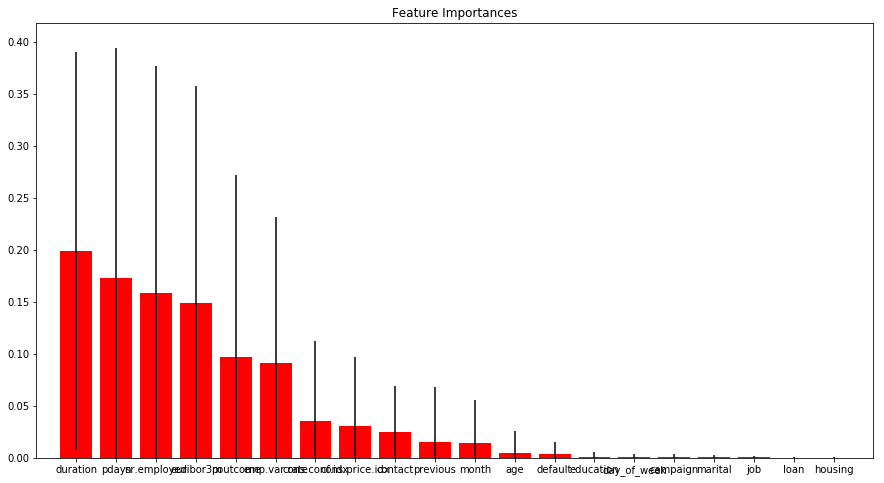

In [7]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]
print (indices)
print("Feature Ranking: ")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

fig = plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

plt.savefig("importances.png", bbox_inches='tight')
plt.savefig("importances.pdf", bbox_inches='tight')

Normalized Confusion Matrix


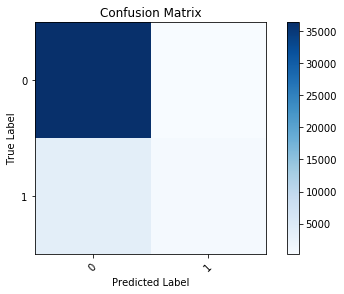

In [11]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix',cmap=plt.cm.Blues):
    
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix, without normalization')
        
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i,j])
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
y_pred = clf.predict(X)
cnf_matrix = confusion_matrix(Y, y_pred)
np.set_printoptions(precision=2)
    
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = range(len(set(Y))), normalize = True, 
                          title = 'Confusion Matrix')

plt.savefig("Loan Confusion.png",bbox_inches='tight')
plt.savefig("Loan Confusion.pdf",bbox_inches='tight')